In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)


from markov_pyactup import *
from statsmodels.formula.api import logit, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


main_dir = os.path.dirname(os.getcwd())
subject_dir = os.path.join(main_dir, 'data', 'human', 'online_data')

main_dir, subject_dir

Error trying to connect to ACT-R at 127.0.0.1 : 2650 with exception (<class 'ConnectionRefusedError'>, ConnectionRefusedError(61, 'Connection refused'), <traceback object at 0x7fe5b496a400>)
ACT-R connection NOT established, but no exception detected or already handled.
Could not start ACT-R connection.


('/Users/cheryang/Documents/GitProject/ACTR-MarkovTask',
 '/Users/cheryang/Documents/GitProject/ACTR-MarkovTask/data/human/online_data')

## Run Experiment

In [19]:
# model_name='markov-rl-hybrid'
model_name='markov-ibl-hybrid'
r1, r0 = 1,0
params = {'REWARD': {'B1': (r1, r0), 'B2': (r1, r0), 'C1': (r1, r0), 'C2': (r1, r0)}}


m = MarkovIBL(verbose=1, model=model_name)
m.update_parameters(**params)
m.run_experiment(n=5) 

################## SETUP MODEL markov-ibl-hybrid ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, 0), 'B2': (1, 0), 'C1': (1, 0), 'C2': (1, 0)}, 'alpha': 0.2, 'beta': 5, 'beta_mf': 5, 'beta_mb': 5, 'lambda_parameter': 0.2, 'p_parameter': 0, 'temperature': 0.2, 'decay': 0.2}
<[MARKOV_STATE] 	[L, 0.00]'A1' 	[R, 0.00]'B2' 	R:[1] 	[C][R]
<[MARKOV_STATE] 	[R, 0.00]'A2' 	[L, 0.00]'C1' 	R:[1] 	[C][C]
<[MARKOV_STATE] 	[R, 0.00]'A2' 	[L, 0.00]'C1' 	R:[0] 	[C][R]
<[MARKOV_STATE] 	[L, 0.00]'A1' 	[L, 0.00]'C1' 	R:[1] 	[R][C]
<[MARKOV_STATE] 	[R, 0.00]'A2' 	[L, 0.00]'C1' 	R:[0] 	[C][R]


## Load Subject Data

In [20]:
subject_id = '1'
df = MarkovEstimation.load_subject_data(subject_dir=subject_dir, subject_id=subject_id)

In [21]:
df.head()

,subject_id,index,state_frequency,received_reward,pre_received_reward,pre_state_frequency,state1_response,state2_response,state1_stay,state1_response_time,state2_response_time
1,sub1,1,common,0.0,reward,common,f,f,1,639.000,483.590
2,sub1,2,rare,0.0,non-reward,common,k,f,0,264.190,718.195
3,sub1,3,common,1.0,non-reward,rare,k,k,1,302.265,1507.225
4,sub1,4,rare,1.0,reward,common,k,k,1,321.685,1751.195
5,sub1,5,rare,0.0,reward,rare,f,k,0,267.490,1042.690


# Estiamte LL

In [22]:
model_name='markov-ibl-mb' 
subject_id ='1'
df = MarkovEstimation.load_subject_data(subject_dir=subject_dir, subject_id=subject_id)
MarkovIBL().estimate_LL(df, init=True, verbose=1, model_name=model_name, **params) 

################## SETUP MODEL markov-ibl-mb ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, 0), 'B2': (1, 0), 'C1': (1, 0), 'C2': (1, 0)}, 'alpha': 0.2, 'beta': 5, 'beta_mf': 5, 'beta_mb': 5, 'lambda_parameter': 0.2, 'p_parameter': 0, 'temperature': 0.2, 'decay': 0.2}
>>> ESTIMATE LOG-LIKELIHOOD markov-ibl-mb [SUBJECT: sub1] <<<
>>> PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, 0), 'B2': (1, 0), 'C1': (1, 0), 'C2': (1, 0)}, 'alpha': 0.2, 'beta': 5, 'beta_mf': 5, 'beta_mb': 5, 'lambda_parameter': 0.2, 'p_parameter': 0, 'temperature': 0.2, 'decay': 0.2} <<<

	...Log-Likelihood = [-199.22]


-199.2249653791522

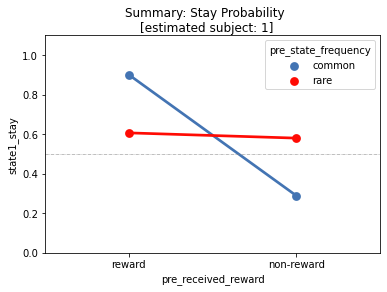

In [23]:
Plot.plot_response_switch(df, model_name='estimated subject: %s' %(subject_id), dep_var_suffix='', barplot=False)

In [24]:
MarkovIBL().estimate_LL(df, init=True, verbose=1, model_name=model_name, decay=.9) 

################## SETUP MODEL markov-ibl-mb ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, 0), 'B2': (1, 0), 'C1': (1, 0), 'C2': (1, 0)}, 'alpha': 0.2, 'beta': 5, 'beta_mf': 5, 'beta_mb': 5, 'lambda_parameter': 0.2, 'p_parameter': 0, 'temperature': 0.2, 'decay': 0.9}
>>> ESTIMATE LOG-LIKELIHOOD markov-ibl-mb [SUBJECT: sub1] <<<
>>> PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, 0), 'B2': (1, 0), 'C1': (1, 0), 'C2': (1, 0)}, 'alpha': 0.2, 'beta': 5, 'beta_mf': 5, 'beta_mb': 5, 'lambda_parameter': 0.2, 'p_parameter': 0, 'temperature': 0.2, 'decay': 0.9} <<<

	...Log-Likelihood = [-322.01]


-322.0092312248361

In [25]:
model_name='markov-ibl-hybrid' 
df = MarkovEstimation.load_subject_data(subject_dir=subject_dir, subject_id='1')
MarkovIBL().estimate_LL(df, init=True, verbose=False, model_name=model_name, **params) 

################## SETUP MODEL markov-ibl-hybrid ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, 0), 'B2': (1, 0), 'C1': (1, 0), 'C2': (1, 0)}, 'alpha': 0.2, 'beta': 5, 'beta_mf': 5, 'beta_mb': 5, 'lambda_parameter': 0.2, 'p_parameter': 0, 'temperature': 0.2, 'decay': 0.2}


-189.21414143988616

## Estimate maxLL of a Subject with 1 Parameter Combination

Let's try to estimate the LL with one specific parameter combnation `[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]` for subject `1` using `markov-rl-mf`

In [26]:
subject_id = '1'
estimate_model = 'markov-rl-mf'

est = MarkovEstimation(model_name=estimate_model, verbose=0)
# est.data = df.iloc[9:]
# res = opt.minimize(est.v_function, x0=[random.random() for i in range(8)], bounds=None, method="Nelder-Mead")

In [27]:
b1 = [(0, 1), (0, 10), (0, 10), (0, 10), (0, 1), (0, 1), (0.01, 1), (0.01, 1)]
i1 = [0.5, 5, 5, 5, .5, .5, 0.5, 0.5]

In [28]:
MarkovEstimation.optimization_function(df=df, x0=i1, param_bounds=b1)

 final_simplex: (array([[0.10908344, 7.3240105 , 3.34125997, 5.6458574 , 0.45425956,
        0.58297811, 0.64245103, 0.64816526],
       [0.10908359, 7.3240139 , 3.34125426, 5.64585866, 0.45425992,
        0.58297769, 0.64245135, 0.64816516],
       [0.10908436, 7.32401119, 3.34125716, 5.64585963, 0.45426018,
        0.58297729, 0.64245102, 0.64816519],
       [0.10908436, 7.32401031, 3.34125631, 5.64585735, 0.45426025,
        0.58297749, 0.64245093, 0.64816502],
       [0.10908474, 7.32400771, 3.34125567, 5.64585881, 0.45426037,
        0.5829775 , 0.64245081, 0.64816513],
       [0.10908542, 7.32400565, 3.34125294, 5.64585637, 0.45426029,
        0.58297741, 0.64245048, 0.6481652 ],
       [0.10908272, 7.32402842, 3.3412398 , 5.64586   , 0.45426041,
        0.58297813, 0.64245212, 0.64816571],
       [0.10908274, 7.32402202, 3.34123598, 5.64586236, 0.45426069,
        0.58297827, 0.64245173, 0.64816554],
       [0.10908653, 7.32400318, 3.34125076, 5.64586119, 0.45426113,
        0.5

In [29]:
b2 = [(0,1),(0,30),(0, 30),(0, 30),(0,1),(-30,30),(0.01, 1),(0.01, 1)]
i2 = [np.random.uniform(l, u) for (l, u) in b2]

MarkovEstimation.optimization_function(df=df, x0=i2, param_bounds=b2)

 final_simplex: (array([[ 0.10994408, 20.84416992, 13.53803244, 17.9057726 ,  0.24240658,
         0.40551532,  0.86970594,  0.5479118 ],
       [ 0.10994439, 20.84418983, 13.53803115, 17.90576881,  0.24240663,
         0.40551868,  0.86970573,  0.54791205],
       [ 0.10994454, 20.84414765, 13.53802299, 17.90579743,  0.24240679,
         0.4055083 ,  0.8697061 ,  0.54790989],
       [ 0.10994378, 20.84414443, 13.53801992, 17.90578921,  0.24240682,
         0.40550984,  0.86970626,  0.54791027],
       [ 0.10994405, 20.84414876, 13.53802137, 17.9057943 ,  0.24240698,
         0.40550418,  0.86970601,  0.54791019],
       [ 0.10994435, 20.84416368, 13.53802209, 17.90578279,  0.24240689,
         0.40551095,  0.86970594,  0.54791081],
       [ 0.10994415, 20.8441629 , 13.53802279, 17.90579008,  0.24240701,
         0.40550825,  0.86970599,  0.5479102 ],
       [ 0.10994398, 20.84414621, 13.53801455, 17.90579751,  0.24240716,
         0.40550233,  0.86970597,  0.54790985],
       [ 0.1099

In [2]:
# estimate_models = ['markov-rl-mf', 'markov-rl-mb', 'markov-rl-hybrid', 'markov-ibl-mb', 'markov-ibl-hybrid']
estimate_models = ['markov-rl-hybrid', 'markov-ibl-hybrid']
dfp = pd.concat([MarkovEstimation.try_estimate(subject_dir, subject_id='1', estimate_model= m) for m in estimate_models], axis=0)

In [3]:
dfp

,alpha,beta,beta_mf,beta_mb,lambda_parameter,p_parameter,temperature,decay,maxLL,estimate_model,subject_id
0,0.9993,20.0330,0.0021,28.6170,0.9264,0.4050,0.0611,0.0112,-134.0955,markov-rl-hybrid,1
0,0.1150,28.9887,20.2307,19.2139,0.1638,0.4201,0.9715,0.4892,-103.5692,markov-ibl-hybrid,1


In [4]:
MarkovEstimation.try_estimate(subject_dir, subject_id='1', estimate_model= 'markov-rl-hybrid')

,alpha,beta,beta_mf,beta_mb,lambda_parameter,p_parameter,temperature,decay,maxLL,estimate_model,subject_id
0,0.1238,23.486,16.6083,17.9019,0.1335,0.3774,0.9378,0.4575,-101.9269,markov-rl-hybrid,1


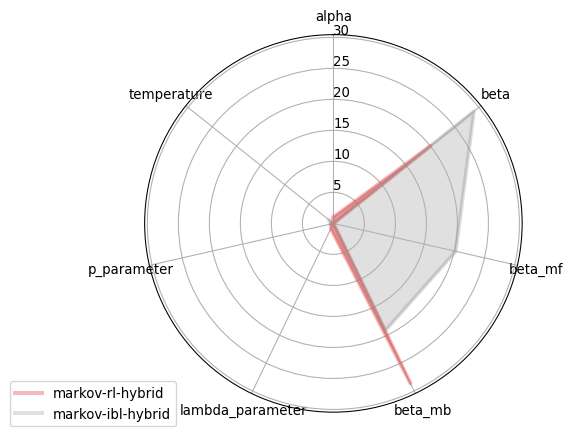

In [5]:
dfpp = dfp.iloc[:, :7]
dfpp['group'] = dfp['estimate_model']
dfpp.index = range(len(dfpp))
Plot.plot_parameter_radar(dfpp, combine=True)

## Optimization Subject LL across Parameter Space

Next, let's try to optimize subject's best parameter 

In [5]:
init_params = [0.1, 5, 0.1, 1, 0, 0.1, 0.1]
param_bounds = [(0, 1), (0, 10), (0, 1), (1, 1), (0, 0), (0,1), (0,1)]

In [6]:
res = MarkovEstimateion.optimization_function(estimate_model='markov-rl-mf', df=df, x0=init_params, param_bounds=param_bounds, save_output='./__cache__')

In [7]:
res

 final_simplex: (array([[0.12242538, 0.91422601, 0.12857875, 1.        , 0.        ,
        0.10373312, 0.11148706],
       [0.1224254 , 0.91422297, 0.12857875, 1.        , 0.        ,
        0.10373319, 0.1114869 ],
       [0.12242544, 0.91421881, 0.12857881, 1.        , 0.        ,
        0.10373318, 0.11148699],
       [0.12242528, 0.91422725, 0.12857883, 1.        , 0.        ,
        0.10373304, 0.11148712],
       [0.12242533, 0.91422283, 0.12857894, 1.        , 0.        ,
        0.10373306, 0.11148698],
       [0.12242544, 0.91421575, 0.12857877, 1.        , 0.        ,
        0.10373315, 0.11148693],
       [0.12242535, 0.91422131, 0.12857887, 1.        , 0.        ,
        0.10373304, 0.11148704],
       [0.12242541, 0.91421688, 0.12857885, 1.        , 0.        ,
        0.10373311, 0.11148699]]), array([115.14537885, 115.14537956, 115.1453805 , 115.14538196,
       115.14538218, 115.1453822 , 115.14538259, 115.14538265]))
           fun: 115.14537884828616
       mes

## Visualize Parameter Combination

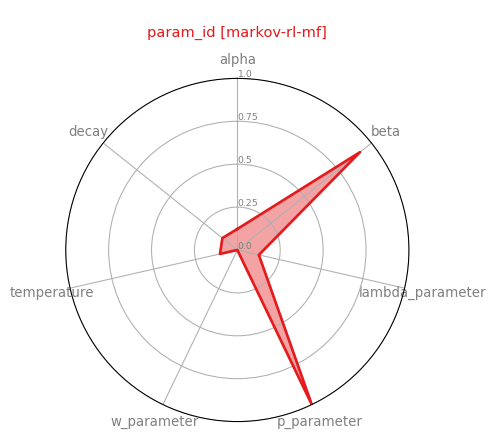

In [8]:
param_names = ['alpha', 'beta', 'lambda_parameter', 'p_parameter', 'w_parameter', 'temperature', 'decay']
best_fit_param = dict(zip(param_names, res['x']))
df_param = pd.DataFrame({**best_fit_param, 'group':estimate_model}, index=[0])
Plot.plot_parameter_radar(df_param)

## Visualize Fit

We could visualize one subject's hyper parameterization using heatmap. Brigh color means better fit parameter (maxLL)

<ipython-input-9-1e0619bf5fce>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + [str(round(x,2)) for x in alphaspace])
<ipython-input-9-1e0619bf5fce>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + [str(round(x, 2)) for x in tempspace])


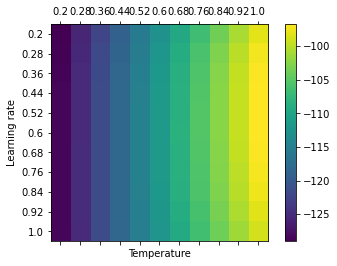

In [9]:
alphaspace = np.linspace(0.2, 1, 11)
tempspace = np.linspace(0.2, 1, 11)
matrix = np.zeros((len(alphaspace), len(tempspace)))
for i, a in enumerate(alphaspace):
    for j, t in enumerate(tempspace):
        matrix[i,j] = MarkovIBL(verbose=0).estimate_LL(df=df, alpha=a, beta=t)
        
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, interpolation='nearest')
fig.colorbar(cax)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xticklabels([''] + [str(round(x,2)) for x in alphaspace])
ax.set_yticklabels([''] + [str(round(x, 2)) for x in tempspace])
ax.set_ylabel("Learning rate")
ax.set_xlabel("Temperature")
plt.show()

In [10]:
subject_id = '1'
df_fits = pd.read_csv(os.path.join(main_dir, "data/human/analysis_code_and_data/output/online_data/RL/online_fits.txt"), 
                      sep='\t', header=None)
df_fits.columns = ['param'+str(i) for i in range(8)] + ['subject_id']
df_fits[df_fits['subject_id']=='sub'+subject_id]

,param0,param1,param2,param3,param4,param5,param6,param7,subject_id
62,63,0.459696,4.076665,2.837247,6.51195,0.702386,-0.040094,158.3123,sub1


<AxesSubplot:ylabel='Count'>

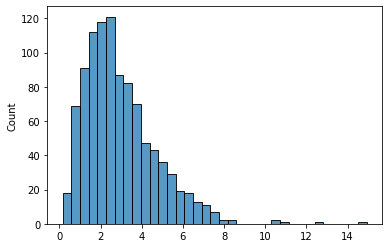

In [9]:
sns.histplot(np.random.gamma(3, 1, 1000))